[Sebastian Raschka](http://www.sebastianraschka.com)

[back](https://github.com/rasbt/matplotlib-gallery) to the `matplotlib-gallery` at [https://github.com/rasbt/matplotlib-gallery](https://github.com/rasbt/matplotlib-gallery)

In [1]:
%load_ext watermark

In [2]:
%watermark -u -v -d -p matplotlib,numpy

Last updated: 21/09/2014 

CPython 3.4.1
IPython 2.2.0

matplotlib 1.4.0
numpy 1.8.2


<font size="1.5em">[More info](http://nbviewer.ipython.org/github/rasbt/python_reference/blob/master/ipython_magic/watermark.ipynb) about the `%watermark` extension</font>

In [3]:
%matplotlib inline

# Scatter plots in matplotlib

# Sections

- [Basic scatter plot](#Basic-scatter-plot)
- [Scatter plot with labels](#Scatter-plot-with-labels)
- [Scatter plot of 2 classes with decision boundary](#Scatter-plot-of-2-classes-with-decision-boundary)
- [Increasing point size with distance from the origin](#Increasing-point-size-with-distance-from-the-origin)

<br>
<br>

# Basic scatter plot

[[back to top](#Sections)]

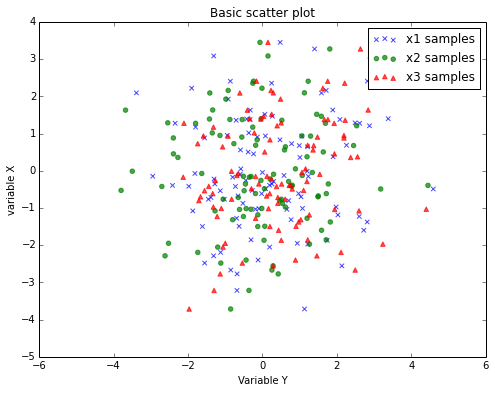

In [8]:
from matplotlib import pyplot as plt
import numpy as np

# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])

x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
x2_samples = np.random.multivariate_normal(mu_vec1+0.2, cov_mat1+0.2, 100)
x3_samples = np.random.multivariate_normal(mu_vec1+0.4, cov_mat1+0.4, 100)

# x1_samples.shape -> (100, 2), 100 rows, 2 columns

plt.figure(figsize=(8,6))
    
plt.scatter(x1_samples[:,0], x1_samples[:,1], marker='x', 
            color='blue', alpha=0.7, label='x1 samples')
plt.scatter(x2_samples[:,0], x1_samples[:,1], marker='o', 
            color='green', alpha=0.7, label='x2 samples')
plt.scatter(x3_samples[:,0], x1_samples[:,1], marker='^', 
            color='red', alpha=0.7, label='x3 samples')
plt.title('Basic scatter plot')
plt.ylabel('variable X')
plt.xlabel('Variable Y')
plt.legend(loc='upper right')

plt.show()

<br>
<br>

# Scatter plot with labels

[[back to top](#Sections)]

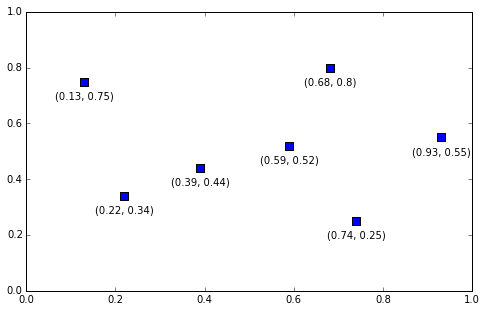

In [4]:
import matplotlib.pyplot as plt

x_coords = [0.13, 0.22, 0.39, 0.59, 0.68, 0.74, 0.93]
y_coords = [0.75, 0.34, 0.44, 0.52, 0.80, 0.25, 0.55]

fig = plt.figure(figsize=(8,5))
plt.scatter(x_coords, y_coords, marker='s', s=50)

for x, y in zip(x_coords, y_coords):
    plt.annotate(
        '(%s, %s)' %(x, y), 
        xy=(x, y), 
        xytext=(0, -10),
        textcoords='offset points', 
        ha='center', 
        va='top')

plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

<br>
<br>

# Scatter plot of 2 classes with decision boundary

[[back to top](#Sections)]

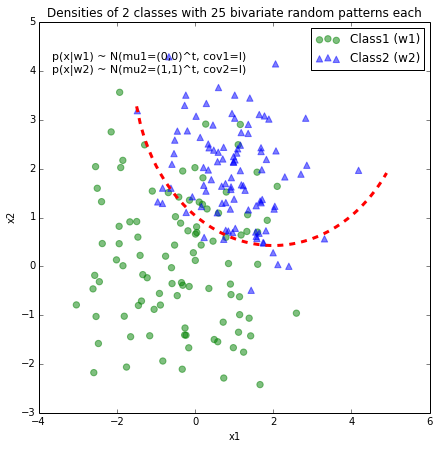

In [5]:
# 2-category classification with random 2D-sample data 
# from a multivariate normal distribution 

import numpy as np
from matplotlib import pyplot as plt

def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))

# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T # to 1-col vector

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x1_samples[:,0], x1_samples[:,1], marker='o', color='green', s=40, alpha=0.5)
ax.scatter(x2_samples[:,0], x2_samples[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc='upper right') 
plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x|w1) ~ N(mu1=(0,0)^t, cov1=I)\np(x|w2) ~ N(mu2=(1,1)^t, cov2=I)'
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

# Adding decision boundary to plot
x_1 = np.arange(-5, 5, 0.1)
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'r--', lw=3)

x_vec = np.linspace(*ax.get_xlim())
x_1 = np.arange(0, 100, 0.05)

plt.show()

<br>
<br>

# Increasing point size with distance from the origin

[[back to top](#Sections)]

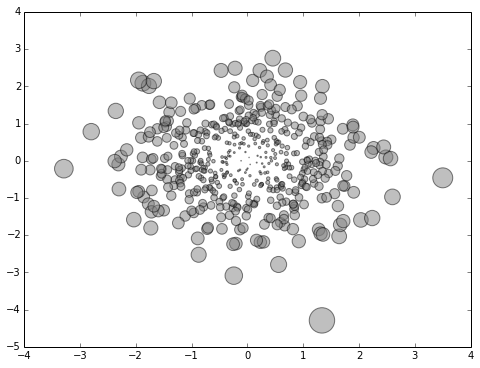

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[1,0],[0,1]])
X = np.random.multivariate_normal(mu_vec1, cov_mat1, 500)

R = X**2
R_sum = R.sum(axis=1)
plt.scatter(X[:, 0], X[:, 1], 
            color='gray', 
            marker='o', 
            s=32. * R_sum,
            edgecolor='black',
            alpha=0.5)
plt.show()